In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Mik_Production2.csv")
data.head(5)

,Year,Milk Production,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1980,1620,NaN,NaN,NaN,NaN
1,1984,2110,NaN,NaN,NaN,NaN
2,1985,2466,NaN,NaN,NaN,NaN
3,1988,2800,NaN,NaN,NaN,NaN
4,1989,3266,NaN,NaN,NaN,NaN


In [3]:
data=data.drop(["Unnamed: 2"],axis=1)
data=data.drop(["Unnamed: 3"],axis=1)
data=data.drop(["Unnamed: 4"],axis=1)
data=data.drop(["Unnamed: 5"],axis=1)

In [4]:
data

,Year,Milk Production
0,1980,1620
1,1984,2110
2,1985,2466
3,1988,2800
4,1989,3266
5,1990,3736
6,1991,3955
7,1992,4222
8,1993,4506
9,1994,4810


Text(0, 0.5, 'Milk Production')

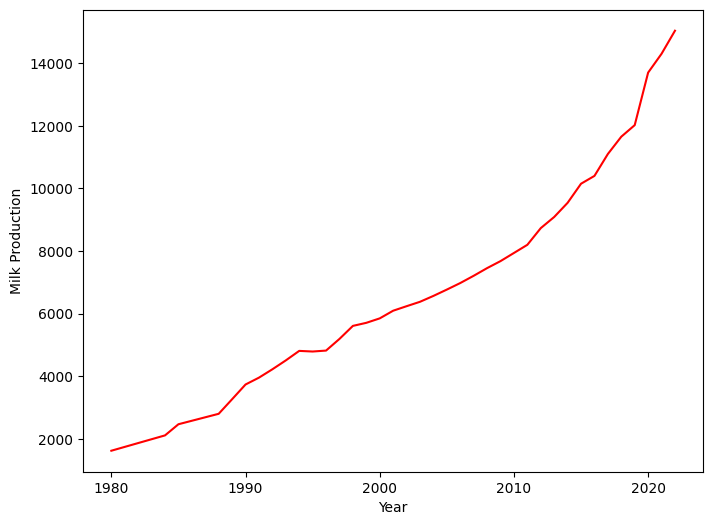

In [5]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Year",y="Milk Production",data=data,color="red")
plt.xlabel("Year")
plt.ylabel("Milk Production")

<Axes: >

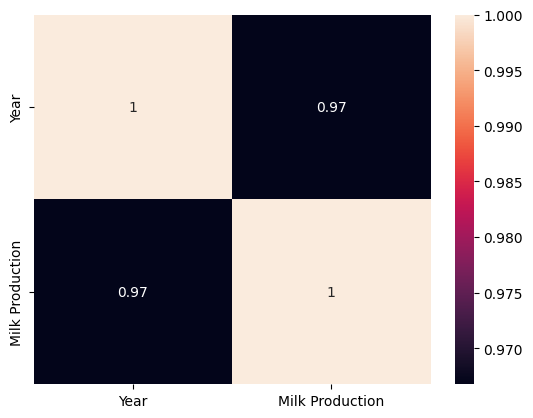

In [6]:
sns.heatmap(data.corr(),annot=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Year             38 non-null     int64
 1   Milk Production  38 non-null     int64
dtypes: int64(2)
memory usage: 740.0 bytes


Text(0, 0.5, 'Milk Production')

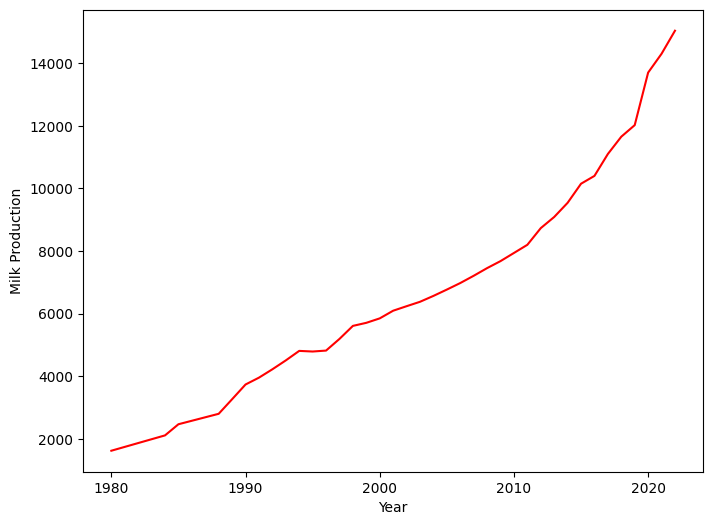

In [8]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Year",y="Milk Production",data=data,color="red")
plt.xlabel("Year")
plt.ylabel("Milk Production")


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
x=data[["Year"]]
y=data["Milk Production"]
x=ss.fit_transform(x)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [14]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None, 0.5, 10],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [15]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=2)  
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estim

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [16]:
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Best Mean Squared Error: {best_score}')
print(f'Test Mean Squared Error: {mse}')


Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Mean Squared Error: 208401.05410666668
Test Mean Squared Error: 59346.45750000003


In [17]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2*100)

99.53616787403166


In [18]:
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})

print(df)


    Actual  Predicted  Difference
33   11655   11385.32      269.68
36   14304   13990.54      313.46
4     3266    3094.00      172.00
13    5609    5274.44      334.56
30   10152    9827.40      324.60
26    8200    7966.32      233.68
6     3955    3997.64      -42.64
27    8733    8754.98      -21.98


In [19]:
# Example data
data_1= {
    'Index': [1, 2, 3, 4, 5, 6, 7,8],
    'Actual': [11655, 14304, 3266, 5609, 10152, 8200, 3955, 8733],
    'Predicted': [11444.39, 14257.03, 3499.60, 5604.36, 9854.72, 8030.29, 4116.42, 8915.97]
}

df = pd.DataFrame(data_1)


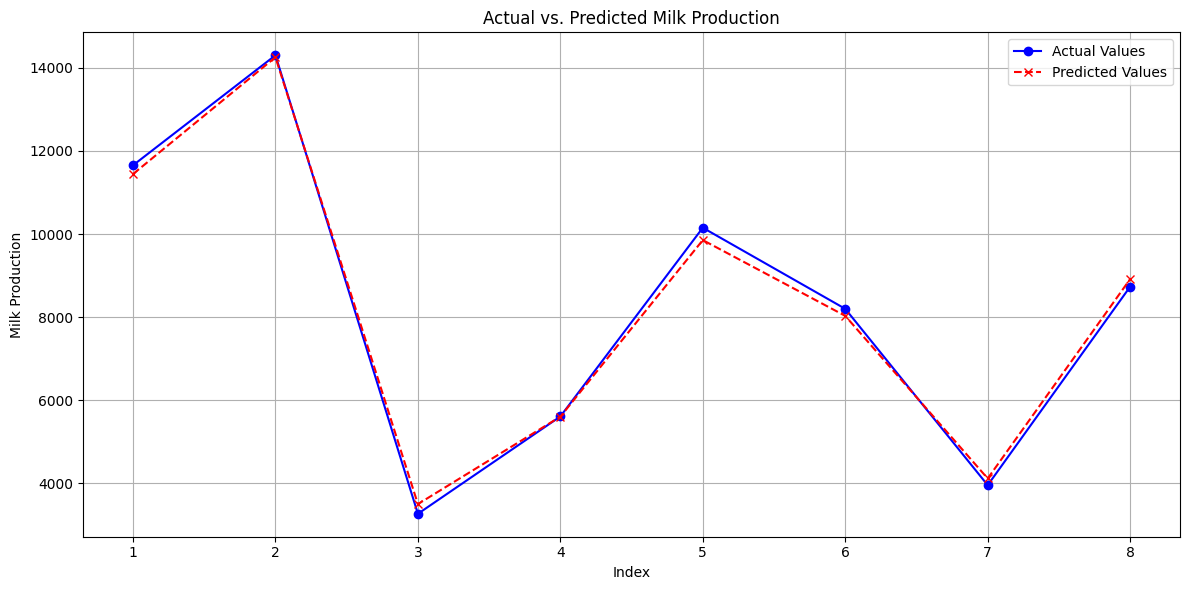

In [20]:
plt.figure(figsize=(12, 6))

plt.plot(df['Index'], df['Actual'], label='Actual Values', color='blue', marker='o')
plt.plot(df['Index'], df['Predicted'], label='Predicted Values', color='red', linestyle='--', marker='x')

plt.xlabel('Index')
plt.ylabel('Milk Production')
plt.title('Actual vs. Predicted Milk Production')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


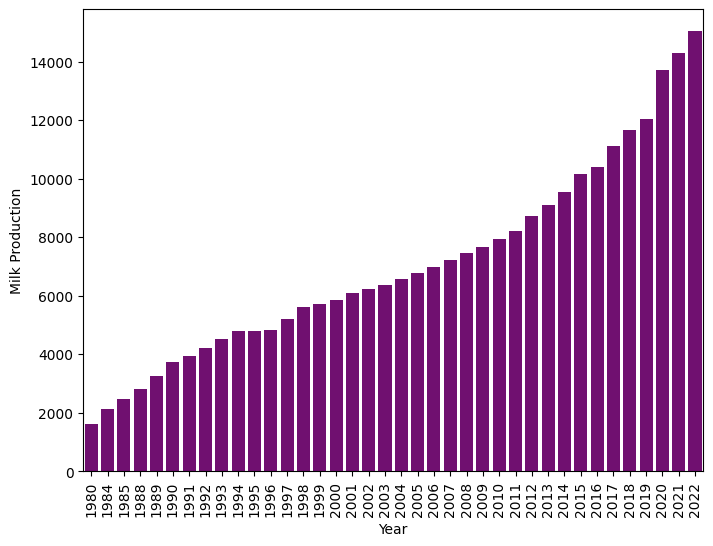

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x="Year",y="Milk Production",data=data,color="purple")
plt.xticks(rotation=90)
plt.show()